In [30]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append('..')
from src.models.model import VSpyct

import torch
import pyro

In [31]:
import random

torch.manual_seed(0)
torch.cuda.manual_seed(0)  # Set seed for CUDA
random.seed(0)
np.random.seed(0)

In [32]:
max_depth = 5
minimum_examples_to_split = 2
epochs = 500
bs = 128
lr = 0.001
subspace_size = 1
device = 'cpu'

In [4]:
# from scipy.io import arff
# import pandas as pd

# atp_train = pd.DataFrame(arff.loadarff('../data/raw/final_datesets/rf2-train.arff')[0]).sample(frac=1)
# atp_test = pd.DataFrame(arff.loadarff('../data/raw/final_datesets/rf2-test.arff')[0]).sample(frac=1)

In [5]:
import arff
import pandas as pd

with open('../../../../clus/data/mtr/slump/settings.ens.test.preds', 'r') as f:
    dataset = arff.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

In [6]:
df.columns

Index(['SLUMP_cm', 'FLOW_cm', 'Compressive_Strength_Mpa', 'SLUMP_cm-pred',
       'FLOW_cm-pred', 'Compressive_Strength_Mpa-pred', 'SLUMP_cm-stdev',
       'FLOW_cm-stdev', 'Compressive_Strength_Mpa-stdev'],
      dtype='object')

In [542]:
preds = df[['SLUMP_cm-pred',
       'FLOW_cm-pred', 'Compressive_Strength_Mpa-pred']].copy().values
true = df[['SLUMP_cm', 'FLOW_cm', 'Compressive_Strength_Mpa']].copy().values

In [544]:
normalized_mae(true, preds)

0.17596512308300663

In [545]:
perf = ('PCT-Ensemble', normalized_mae(true, preds))

In [546]:
import pickle
with open ('../../../../clus/data/mtr/slump/pct_ensemble.pcl', 'wb') as fp:
  pickle.dump(perf, fp)

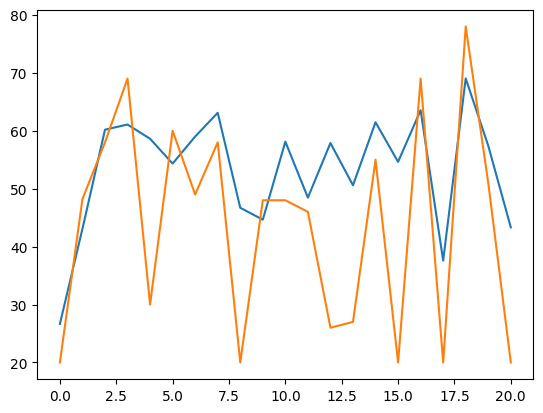

In [547]:
import matplotlib.pyplot as plt

plt.plot(preds[:, 1])
plt.plot(true[:, 1])

In [49]:
import arff
import pandas as pd

with open('../data/raw/final_datesets/rf2_mtr.arff', 'r') as f:
    dataset = arff.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Shuffle the DataFrame if needed
df = df.sample(frac=1).reset_index(drop=True)

In [50]:
# import arff
# import pandas as pd

# with open('../data/raw/final_datesets/slump_mtr.arff', 'r') as f:
#     dataset = arff.load(f)

# # Convert the data to a pandas DataFrame
# df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# # Shuffle the DataFrame if needed
# df = df.sample(frac=1).reset_index(drop=True)

In [51]:
df.head()

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,napm7_42to48hr__n60,dldi4_42to48hr__n60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,180.0,3.27,179.0,130.0,40.8,6.08,125.0,35.1,182.0,3.27,...,0.00,0.00,188.0,3.30,198.0,130.0,45.2,8.25,126.0,33.4
1,163.0,3.24,168.0,47.0,107.0,5.92,45.2,85.9,161.0,3.19,...,0.01,0.00,160.0,3.24,154.0,47.4,96.2,4.54,43.8,74.3
2,151.0,3.68,150.0,75.2,59.0,14.70,58.0,31.2,151.0,3.68,...,0.00,0.00,163.0,3.53,155.0,78.6,52.6,12.60,58.0,24.9
3,84.5,3.28,90.9,45.3,44.4,4.85,42.2,35.6,84.1,3.27,...,0.00,0.01,90.0,3.21,86.4,44.9,37.0,3.35,42.2,30.4
4,93.6,3.23,100.0,45.0,53.3,6.86,42.8,45.1,93.9,3.22,...,0.00,0.01,95.0,3.25,104.0,47.8,47.2,6.51,42.8,43.0


In [52]:
df.shape, df.shape

((9125, 584), (9125, 584))

In [53]:
lst = df.columns.tolist()
lst[-20:]

['clkm7_36to42hr__n60',
 'vali2_36to42hr__n60',
 'napm7_36to42hr__n60',
 'dldi4_36to42hr__n60',
 'chsi2_42to48hr__n60',
 'nasi2_42to48hr__n60',
 'eadm7_42to48hr__n60',
 'sclm7_42to48hr__n60',
 'clkm7_42to48hr__n60',
 'vali2_42to48hr__n60',
 'napm7_42to48hr__n60',
 'dldi4_42to48hr__n60',
 'CHSI2_48H__0',
 'NASI2_48H__0',
 'EADM7_48H__0',
 'SCLM7_48H__0',
 'CLKM7_48H__0',
 'VALI2_48H__0',
 'NAPM7_48H__0',
 'DLDI4_48H__0']

In [54]:
# Select columns with dtype 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Convert these columns to strings
df[object_columns] = df[object_columns].astype('str')


from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the data
encoded_array = encoder.fit_transform(df[object_columns])

# Get the new column names
encoded_cols = encoder.get_feature_names_out(object_columns)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

# Combine with the original DataFrame (excluding the object columns)
df = pd.concat([df.drop(columns=object_columns), encoded_df], axis=1)

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
df.columns.tolist()

['CHSI2__0',
 'NASI2__0',
 'EADM7__0',
 'SCLM7__0',
 'CLKM7__0',
 'VALI2__0',
 'NAPM7__0',
 'DLDI4__0',
 'CHSI2__n6',
 'NASI2__n6',
 'EADM7__n6',
 'SCLM7__n6',
 'CLKM7__n6',
 'VALI2__n6',
 'NAPM7__n6',
 'DLDI4__n6',
 'CHSI2__n12',
 'NASI2__n12',
 'EADM7__n12',
 'SCLM7__n12',
 'CLKM7__n12',
 'VALI2__n12',
 'NAPM7__n12',
 'DLDI4__n12',
 'CHSI2__n18',
 'NASI2__n18',
 'EADM7__n18',
 'SCLM7__n18',
 'CLKM7__n18',
 'VALI2__n18',
 'NAPM7__n18',
 'DLDI4__n18',
 'CHSI2__n24',
 'NASI2__n24',
 'EADM7__n24',
 'SCLM7__n24',
 'CLKM7__n24',
 'VALI2__n24',
 'NAPM7__n24',
 'DLDI4__n24',
 'CHSI2__n36',
 'NASI2__n36',
 'EADM7__n36',
 'SCLM7__n36',
 'CLKM7__n36',
 'VALI2__n36',
 'NAPM7__n36',
 'DLDI4__n36',
 'CHSI2__n48',
 'NASI2__n48',
 'EADM7__n48',
 'SCLM7__n48',
 'CLKM7__n48',
 'VALI2__n48',
 'NAPM7__n48',
 'DLDI4__n48',
 'CHSI2__n60',
 'NASI2__n60',
 'EADM7__n60',
 'SCLM7__n60',
 'CLKM7__n60',
 'VALI2__n60',
 'NAPM7__n60',
 'DLDI4__n60',
 'chsi2_0to6hr__0',
 'nasi2_0to6hr__0',
 'eadm7_0to6hr__0',
 'sc

In [56]:
target_colz =     ['CHSI2_48H__0',
 'NASI2_48H__0',
 'EADM7_48H__0',
 'SCLM7_48H__0',
 'CLKM7_48H__0',
 'VALI2_48H__0',
 'NAPM7_48H__0',
 'DLDI4_48H__0']

non_target_columns = df.columns[~df.columns.isin(target_colz)]

In [57]:
df

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,napm7_42to48hr__n60,dldi4_42to48hr__n60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,180.0,3.27,179.0,130.0,40.8,6.08,125.0,35.1,182.0,3.27,...,0.00,0.00,188.0,3.30,198.0,130.0,45.2,8.25,126.0,33.4
1,163.0,3.24,168.0,47.0,107.0,5.92,45.2,85.9,161.0,3.19,...,0.01,0.00,160.0,3.24,154.0,47.4,96.2,4.54,43.8,74.3
2,151.0,3.68,150.0,75.2,59.0,14.70,58.0,31.2,151.0,3.68,...,0.00,0.00,163.0,3.53,155.0,78.6,52.6,12.60,58.0,24.9
3,84.5,3.28,90.9,45.3,44.4,4.85,42.2,35.6,84.1,3.27,...,0.00,0.01,90.0,3.21,86.4,44.9,37.0,3.35,42.2,30.4
4,93.6,3.23,100.0,45.0,53.3,6.86,42.8,45.1,93.9,3.22,...,0.00,0.01,95.0,3.25,104.0,47.8,47.2,6.51,42.8,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,187.0,3.31,196.0,130.0,40.8,5.83,123.0,36.2,184.0,3.22,...,0.00,0.01,185.0,3.30,190.0,130.0,47.2,10.20,118.0,33.3
9121,182.0,3.31,176.0,129.0,40.8,5.26,122.0,30.7,186.0,3.31,...,0.01,0.00,178.0,3.24,181.0,129.0,46.8,8.63,126.0,34.6
9122,108.0,3.85,93.3,50.4,23.3,7.11,42.9,23.6,109.0,3.81,...,0.00,0.00,92.9,3.71,86.4,59.7,26.3,5.94,44.7,27.2
9123,94.4,3.26,104.0,47.8,49.5,6.70,42.8,43.0,94.2,3.23,...,0.00,0.00,95.4,3.24,96.0,45.5,47.4,5.75,41.9,41.3


In [58]:
df[non_target_columns] = df[non_target_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for_scaling = df.columns[~df.columns.isin(target_colz)].tolist()
# for_scaling = df.columns.tolist()

scaled_values = scaler.fit_transform(df[[col for col in df.columns if col in for_scaling]])
df[for_scaling] = pd.DataFrame(scaled_values, columns=for_scaling)

In [60]:
df

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,napm7_42to48hr__n60,dldi4_42to48hr__n60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,0.396521,0.022868,0.399249,0.573901,0.141199,0.141420,0.681677,0.177201,0.403621,0.022868,...,0.000000,0.00,188.0,3.30,198.0,130.0,45.2,8.25,126.0,33.4
1,0.336173,0.022481,0.353358,0.021305,0.568021,0.136392,0.062112,0.750564,0.329073,0.021835,...,0.006667,0.00,160.0,3.24,154.0,47.4,96.2,4.54,43.8,74.3
2,0.293575,0.028165,0.278264,0.209055,0.258543,0.412319,0.161491,0.133183,0.293575,0.028165,...,0.000000,0.00,163.0,3.53,155.0,78.6,52.6,12.60,58.0,24.9
3,0.057508,0.022997,0.031706,0.009987,0.164410,0.102766,0.038820,0.182844,0.056088,0.022868,...,0.000000,0.02,90.0,3.21,86.4,44.9,37.0,3.35,42.2,30.4
4,0.089812,0.022351,0.069670,0.007989,0.221792,0.165933,0.043478,0.290068,0.090877,0.022222,...,0.000000,0.02,95.0,3.25,104.0,47.8,47.2,6.51,42.8,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,0.421370,0.023385,0.470171,0.573901,0.141199,0.133564,0.666149,0.189616,0.410721,0.022222,...,0.000000,0.02,185.0,3.30,190.0,130.0,47.2,10.20,118.0,33.3
9121,0.403621,0.023385,0.386733,0.567244,0.141199,0.115651,0.658385,0.127540,0.417820,0.023385,...,0.006667,0.00,178.0,3.24,181.0,129.0,46.8,8.63,126.0,34.6
9122,0.140930,0.030362,0.041719,0.043941,0.028369,0.173790,0.044255,0.047404,0.144480,0.029845,...,0.000000,0.00,92.9,3.71,86.4,59.7,26.3,5.94,44.7,27.2
9123,0.092652,0.022739,0.086358,0.026631,0.197292,0.160905,0.043478,0.266366,0.091942,0.022351,...,0.000000,0.00,95.4,3.24,96.0,45.5,47.4,5.75,41.9,41.3


In [61]:
len(target_colz)

8

In [62]:
target_colz

['CHSI2_48H__0',
 'NASI2_48H__0',
 'EADM7_48H__0',
 'SCLM7_48H__0',
 'CLKM7_48H__0',
 'VALI2_48H__0',
 'NAPM7_48H__0',
 'DLDI4_48H__0']

In [63]:
df.shape

(9125, 584)

In [64]:
import numpy as np

# Calculate the number of new columns (30% of current columns)
num_existing_columns = len(df.columns)
num_new_columns = int(np.ceil(num_existing_columns))

# Generate new random columns
for i in range(num_new_columns):
    new_col_name = f'Random_{i+1}'
    df[new_col_name] = np.random.normal(loc=0, scale=1, size=len(df))  # Mean=0, StdDev=1


/var/folders/6s/30hzfwv55yqb02p59m4zk_b00000gn/T/ipykernel_2436/2246716273.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.random.normal(loc=0, scale=1, size=len(df))  # Mean=0, StdDev=1
/var/folders/6s/30hzfwv55yqb02p59m4zk_b00000gn/T/ipykernel_2436/2246716273.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.random.normal(loc=0, scale=1, size=len(df))  # Mean=0, StdDev=1
/var/folders/6s/30hzfwv55yqb02p59m4zk_b00000gn/T/ipykernel_2436/2246716273.py:10: PerformanceWarning: Data

In [65]:
df

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,Random_575,Random_576,Random_577,Random_578,Random_579,Random_580,Random_581,Random_582,Random_583,Random_584
0,0.396521,0.022868,0.399249,0.573901,0.141199,0.141420,0.681677,0.177201,0.403621,0.022868,...,1.076807,1.037088,-0.787340,-0.482668,-0.177990,0.601656,-0.786142,-0.048304,0.191352,-0.368646
1,0.336173,0.022481,0.353358,0.021305,0.568021,0.136392,0.062112,0.750564,0.329073,0.021835,...,-1.275835,-0.051297,-1.586127,1.189715,-0.535391,-1.244648,-0.812782,0.630967,0.056057,0.249284
2,0.293575,0.028165,0.278264,0.209055,0.258543,0.412319,0.161491,0.133183,0.293575,0.028165,...,0.477149,1.628850,-0.724682,-1.034428,-0.597486,0.142548,-1.951409,1.955965,-0.224385,-0.003274
3,0.057508,0.022997,0.031706,0.009987,0.164410,0.102766,0.038820,0.182844,0.056088,0.022868,...,0.818574,-0.306459,-0.624100,0.308399,1.488429,0.081913,-0.249014,0.067003,-0.104237,-0.080084
4,0.089812,0.022351,0.069670,0.007989,0.221792,0.165933,0.043478,0.290068,0.090877,0.022222,...,-0.019600,-1.672847,-0.041720,-1.169756,1.242297,-0.322198,1.222047,-0.052407,-0.905179,2.332476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,0.421370,0.023385,0.470171,0.573901,0.141199,0.133564,0.666149,0.189616,0.410721,0.022222,...,-0.117866,0.515096,-0.631842,-0.597728,-0.683932,-0.903307,-1.715432,-1.570210,-0.130554,0.669816
9121,0.403621,0.023385,0.386733,0.567244,0.141199,0.115651,0.658385,0.127540,0.417820,0.023385,...,1.838466,2.233012,1.467771,-0.207801,-0.499572,2.774190,-2.617906,-1.174753,-1.552590,0.215301
9122,0.140930,0.030362,0.041719,0.043941,0.028369,0.173790,0.044255,0.047404,0.144480,0.029845,...,0.297265,0.535028,2.243582,-0.113454,0.014341,1.177460,-0.408621,-1.024455,-0.265924,0.283797
9123,0.092652,0.022739,0.086358,0.026631,0.197292,0.160905,0.043478,0.266366,0.091942,0.022351,...,1.389126,-0.487707,1.078459,0.173032,-0.064404,-0.025191,-0.158136,-1.136862,0.141031,1.191329


In [66]:
X = df.drop(columns=target_colz)
y = df[target_colz]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
import pickle

# save X_train, X_test, y_train, y_test to pickle

with open('../rf2_mtr_files.pcl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [24]:
train.columns

Index(['timeunit', 'storageCost', 'interestRate', 'compidx0lt2',
       'compidx0lt2l1', 'compidx0lt2l2', 'compidx0lt2l4', 'compidx0lt2l8',
       'compidx1lt2', 'compidx2lt2',
       ...
       'Random_287', 'Random_288', 'Random_289', 'Random_290', 'Random_291',
       'Random_292', 'Random_293', 'Random_294', 'Random_295', 'Random_296'],
      dtype='object', length=592)

In [28]:
import arff

# Convert DataFrame to ARFF format
def dataframe_to_arff(df, file_path, relation_name="relation"):
    attributes = []
    for col in df.columns:
        if df[col].dtype.kind in "biufc":  # Numeric
            attributes.append((col, "NUMERIC"))
        elif df[col].dtype.kind == "O":  # Object/String
            attributes.append((col, "STRING"))
        elif df[col].dtype.name == "category":  # Categorical
            attributes.append((col, df[col].cat.categories.tolist()))
    
    arff_data = {
        "relation": relation_name,
        "attributes": attributes,
        "data": df.values.tolist(),
    }

    # Write ARFF file
    with open(file_path, "w") as f:
        arff.dump(arff_data, f)

In [517]:
# Save to ARFF file
dataframe_to_arff(train, '../../../../clus/data/mtr/slump/slump_train.arff', relation_name="example")
dataframe_to_arff(test, '../../../../clus/data/mtr/slump/slump_test.arff', relation_name="example")

In [29]:
# X = df.drop(columns=target_colz).values
# y = df[target_colz].values

In [67]:
from sklearn.model_selection import train_test_split

x_atp_train, x_atp_test, y_atp_train, y_atp_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [68]:
from spyct import Model

ensemble_spyct = Model(num_trees=10)
single_spyct = Model(num_trees=1)

single_spyct.fit(x_atp_train, y_atp_train)
ensemble_spyct.fit(x_atp_train, y_atp_train)

KeyboardInterrupt: 

In [33]:
torch.tensor(y_atp_train).shape

torch.Size([7300, 8])

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

torch.tensor(scaler.fit_transform(y_atp_train)).shape

torch.Size([7300, 8])

In [72]:
vspyct = VSpyct(bs=256, max_depth=max_depth, epochs=epochs, lr=lr, minimum_examples_to_split=minimum_examples_to_split)
vspyct.fit(torch.Tensor(x_atp_train), torch.Tensor(y_atp_train))

Total variance: 3489.9140625


Epochs: 100%|██████████| 500/500 [01:09<00:00,  7.16it/s]


Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([2753]) Var left tensor(3834.2456)
Rows right:  torch.Size([4547]) Var right tensor(982.5007)


Epochs:  58%|█████▊    | 288/500 [00:23<00:17, 12.06it/s]


Early stopping at epoch 288.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([1397]) Var left tensor(462.6512)
Rows right:  torch.Size([3150]) Var right tensor(683.2690)


Epochs: 100%|██████████| 500/500 [00:31<00:00, 15.94it/s]


Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([1180]) Var left tensor(328.3487)
Rows right:  torch.Size([1970]) Var right tensor(589.3309)


Epochs:  78%|███████▊  | 391/500 [00:15<00:04, 25.09it/s]


Early stopping at epoch 391.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([808]) Var left tensor(573.4318)
Rows right:  torch.Size([1162]) Var right tensor(590.2682)


Epochs:  36%|███▌      | 178/500 [00:04<00:08, 39.58it/s]


Early stopping at epoch 178.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([650]) Var left tensor(490.1021)
Rows right:  torch.Size([512]) Var right tensor(662.5856)


Epochs:  30%|██▉       | 149/500 [00:03<00:08, 42.58it/s]


Early stopping at epoch 149.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([394]) Var left tensor(434.0225)
Rows right:  torch.Size([414]) Var right tensor(667.8081)


Epochs:  52%|█████▏    | 260/500 [00:07<00:06, 35.93it/s]


Early stopping at epoch 260.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([614]) Var left tensor(261.5622)
Rows right:  torch.Size([566]) Var right tensor(365.2988)


Epochs:  25%|██▍       | 123/500 [00:01<00:05, 71.60it/s]


Early stopping at epoch 123.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([242]) Var left tensor(480.4992)
Rows right:  torch.Size([324]) Var right tensor(257.0432)


Epochs:  42%|████▏     | 209/500 [00:03<00:04, 67.03it/s]


Early stopping at epoch 209.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([251]) Var left tensor(348.6081)
Rows right:  torch.Size([363]) Var right tensor(166.3569)


Epochs:  52%|█████▏    | 260/500 [00:08<00:07, 31.85it/s]


Early stopping at epoch 260.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([904]) Var left tensor(160.6560)
Rows right:  torch.Size([493]) Var right tensor(429.9395)


Epochs:  28%|██▊       | 142/500 [00:01<00:03, 96.25it/s]


Early stopping at epoch 142.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([276]) Var left tensor(274.6064)
Rows right:  torch.Size([217]) Var right tensor(379.6349)


Epochs:   2%|▏         | 12/500 [00:00<00:02, 179.60it/s]


Early stopping at epoch 12.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([113]) Var left tensor(354.9300)
Rows right:  torch.Size([104]) Var right tensor(404.8506)


Epochs:  30%|███       | 152/500 [00:01<00:03, 111.75it/s]


Early stopping at epoch 152.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([153]) Var left tensor(244.3002)
Rows right:  torch.Size([123]) Var right tensor(218.2424)


Epochs:  37%|███▋      | 186/500 [00:03<00:05, 54.43it/s]


Early stopping at epoch 186.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([526]) Var left tensor(157.8152)
Rows right:  torch.Size([378]) Var right tensor(141.4283)


Epochs:  28%|██▊       | 139/500 [00:01<00:03, 105.68it/s]


Early stopping at epoch 139.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([181]) Var left tensor(156.7870)
Rows right:  torch.Size([197]) Var right tensor(100.2676)


Epochs:  45%|████▌     | 225/500 [00:03<00:03, 71.75it/s]


Early stopping at epoch 225.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([294]) Var left tensor(114.9114)
Rows right:  torch.Size([232]) Var right tensor(181.3885)


Epochs:  46%|████▌     | 229/500 [00:12<00:14, 18.96it/s]


Early stopping at epoch 229.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([791]) Var left tensor(1387.0175)
Rows right:  torch.Size([1962]) Var right tensor(2869.5244)


Epochs:  56%|█████▋    | 282/500 [00:11<00:08, 24.84it/s]


Early stopping at epoch 282.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([952]) Var left tensor(620.0341)
Rows right:  torch.Size([1010]) Var right tensor(2503.6670)


Epochs:  36%|███▌      | 181/500 [00:03<00:06, 50.75it/s]


Early stopping at epoch 181.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([505]) Var left tensor(2078.9614)
Rows right:  torch.Size([505]) Var right tensor(1863.2118)


Epochs:  41%|████      | 205/500 [00:02<00:03, 90.13it/s] 


Early stopping at epoch 205.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([249]) Var left tensor(1390.0975)
Rows right:  torch.Size([256]) Var right tensor(1584.9424)


Epochs:  34%|███▎      | 168/500 [00:01<00:03, 104.10it/s]


Early stopping at epoch 168.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([375]) Var left tensor(1562.0228)
Rows right:  torch.Size([130]) Var right tensor(1976.6794)


Epochs:  45%|████▌     | 225/500 [00:04<00:05, 53.75it/s]


Early stopping at epoch 225.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([376]) Var left tensor(655.3248)
Rows right:  torch.Size([576]) Var right tensor(583.1832)


Epochs:  32%|███▏      | 161/500 [00:02<00:05, 66.26it/s]


Early stopping at epoch 161.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([323]) Var left tensor(449.0206)
Rows right:  torch.Size([253]) Var right tensor(738.3971)


Epochs:   3%|▎         | 14/500 [00:00<00:05, 93.80it/s]

Early stopping at epoch 14.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)


Rows left:  torch.Size([147]) Var left tensor(644.9102)
Rows right:  torch.Size([229]) Var right tensor(661.3402)


Epochs:  39%|███▉      | 197/500 [00:03<00:05, 54.89it/s]


Early stopping at epoch 197.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([444]) Var left tensor(1312.9637)
Rows right:  torch.Size([347]) Var right tensor(1449.8634)


Epochs:  44%|████▍     | 222/500 [00:02<00:02, 100.73it/s]


Early stopping at epoch 222.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([181]) Var left tensor(1376.7030)
Rows right:  torch.Size([166]) Var right tensor(1281.9673)


Epochs:   5%|▌         | 25/500 [00:00<00:02, 189.39it/s]


Early stopping at epoch 25.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([74]) Var left tensor(1111.0814)
Rows right:  torch.Size([92]) Var right tensor(1357.0909)


Epochs:  39%|███▊      | 193/500 [00:00<00:01, 206.81it/s]


Early stopping at epoch 193.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([124]) Var left tensor(625.5266)
Rows right:  torch.Size([57]) Var right tensor(1984.9518)


Epochs:   8%|▊         | 41/500 [00:00<00:04, 103.15it/s]


Early stopping at epoch 41.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([202]) Var left tensor(1692.1082)
Rows right:  torch.Size([242]) Var right tensor(904.7183)


Epochs:  20%|█▉        | 98/500 [00:00<00:01, 204.41it/s]


Early stopping at epoch 98.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([156]) Var left tensor(1051.7297)
Rows right:  torch.Size([86]) Var right tensor(372.3145)


Epochs:  17%|█▋        | 85/500 [00:00<00:02, 199.86it/s]

Early stopping at epoch 85.
Impurity(
  (linear): PyroLinear(in_features=1160, out_features=1, bias=True)
)
Rows left:  torch.Size([97]) Var left tensor(873.3416)
Rows right:  torch.Size([105]) Var right tensor(1971.4092)


In [73]:
feature_importance_rf2 = vspyct.feature_importances().tolist()

In [38]:
import pickle

with open('../rf2_str_feat_imp.pcl', 'wb') as f:
    pickle.dump(feature_importance_rf2, f)

In [36]:
vspyct.feature_importances().shape

torch.Size([576])

In [28]:
df.shape

(3650, 1168)

In [74]:
dct = dict(zip(X.columns.tolist(), vspyct.feature_importances().tolist()))
random_cols = [col for col in list(dct.keys()) if 'Random' in col]
other_cols = [col for col in list(dct.keys()) if col not in random_cols]

In [75]:
X

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__n6,NASI2__n6,...,Random_575,Random_576,Random_577,Random_578,Random_579,Random_580,Random_581,Random_582,Random_583,Random_584
0,0.396521,0.022868,0.399249,0.573901,0.141199,0.141420,0.681677,0.177201,0.403621,0.022868,...,1.076807,1.037088,-0.787340,-0.482668,-0.177990,0.601656,-0.786142,-0.048304,0.191352,-0.368646
1,0.336173,0.022481,0.353358,0.021305,0.568021,0.136392,0.062112,0.750564,0.329073,0.021835,...,-1.275835,-0.051297,-1.586127,1.189715,-0.535391,-1.244648,-0.812782,0.630967,0.056057,0.249284
2,0.293575,0.028165,0.278264,0.209055,0.258543,0.412319,0.161491,0.133183,0.293575,0.028165,...,0.477149,1.628850,-0.724682,-1.034428,-0.597486,0.142548,-1.951409,1.955965,-0.224385,-0.003274
3,0.057508,0.022997,0.031706,0.009987,0.164410,0.102766,0.038820,0.182844,0.056088,0.022868,...,0.818574,-0.306459,-0.624100,0.308399,1.488429,0.081913,-0.249014,0.067003,-0.104237,-0.080084
4,0.089812,0.022351,0.069670,0.007989,0.221792,0.165933,0.043478,0.290068,0.090877,0.022222,...,-0.019600,-1.672847,-0.041720,-1.169756,1.242297,-0.322198,1.222047,-0.052407,-0.905179,2.332476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,0.421370,0.023385,0.470171,0.573901,0.141199,0.133564,0.666149,0.189616,0.410721,0.022222,...,-0.117866,0.515096,-0.631842,-0.597728,-0.683932,-0.903307,-1.715432,-1.570210,-0.130554,0.669816
9121,0.403621,0.023385,0.386733,0.567244,0.141199,0.115651,0.658385,0.127540,0.417820,0.023385,...,1.838466,2.233012,1.467771,-0.207801,-0.499572,2.774190,-2.617906,-1.174753,-1.552590,0.215301
9122,0.140930,0.030362,0.041719,0.043941,0.028369,0.173790,0.044255,0.047404,0.144480,0.029845,...,0.297265,0.535028,2.243582,-0.113454,0.014341,1.177460,-0.408621,-1.024455,-0.265924,0.283797
9123,0.092652,0.022739,0.086358,0.026631,0.197292,0.160905,0.043478,0.266366,0.091942,0.022351,...,1.389126,-0.487707,1.078459,0.173032,-0.064404,-0.025191,-0.158136,-1.136862,0.141031,1.191329


In [76]:
# Prepare data for plotting
random_vals = [dct[col] for col in random_cols]
other_vals = [dct[col] for col in other_cols]

In [44]:
ensemble_spyct.feature_importances

array([0.1918644 , 0.17849629, 0.21677533, ..., 0.03818631, 0.09491839,
       0.04225751])

In [45]:
len(random_cols)

584

In [46]:
vspyct.feature_importances()

tensor([0.1478, 0.3323, 0.2393,  ..., 0.0859, 0.0758, 0.0715])

In [47]:
sum(random_vals)/len(random_vals), sum(other_vals)/len(other_vals)

(0.09378422826069267, 0.12985619936888623)

In [49]:
dct

{'CHSI2__0': 0.14690838754177094,
 'NASI2__0': 0.33025550842285156,
 'EADM7__0': 0.23896059393882751,
 'SCLM7__0': 0.24251800775527954,
 'CLKM7__0': 0.14104458689689636,
 'VALI2__0': 0.11120669543743134,
 'NAPM7__0': 0.10798114538192749,
 'DLDI4__0': 0.17303647100925446,
 'CHSI2__n6': 0.1537451446056366,
 'NASI2__n6': 0.17967906594276428,
 'EADM7__n6': 0.2579668462276459,
 'SCLM7__n6': 0.24619443714618683,
 'CLKM7__n6': 0.16197393834590912,
 'VALI2__n6': 0.13741330802440643,
 'NAPM7__n6': 0.0976431593298912,
 'DLDI4__n6': 0.21821022033691406,
 'CHSI2__n12': 0.10558707267045975,
 'NASI2__n12': 0.3025204837322235,
 'EADM7__n12': 0.20518288016319275,
 'SCLM7__n12': 0.1978003829717636,
 'CLKM7__n12': 0.14432570338249207,
 'VALI2__n12': 0.12282568961381912,
 'NAPM7__n12': 0.11640758067369461,
 'DLDI4__n12': 0.20829840004444122,
 'CHSI2__n18': 0.13180656731128693,
 'NASI2__n18': 0.13270312547683716,
 'EADM7__n18': 0.2076394110918045,
 'SCLM7__n18': 0.20376160740852356,
 'CLKM7__n18': 0.13873

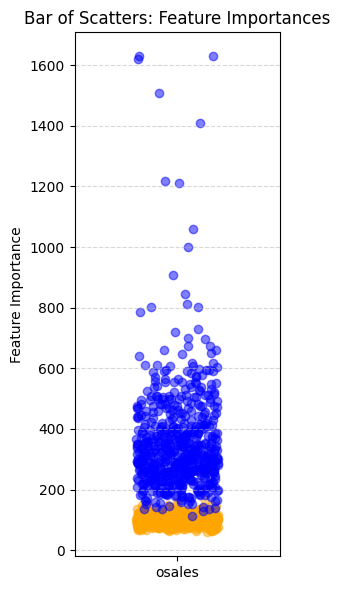

In [77]:
import matplotlib.pyplot as plt

# Create a "bar of scatters" plot with a single column 
plt.figure(figsize=(3, 6))

# Combine all columns into a single vertical column of scatter points
all_cols = random_cols + other_cols
all_vals = [dct[col] for col in all_cols]
all_colors = ['orange' if col in random_cols else 'blue' for col in all_cols]
all_jitter = np.random.uniform(-0.2, 0.2, size=len(all_cols))  # Add slight horizontal jitter for visual separation

# Plot scatter points
for i, (val, color) in enumerate(zip(all_vals, all_colors)):
    plt.scatter(0 + all_jitter[i], val, color=color, alpha=0.5)

# Enhance plot
plt.title("Bar of Scatters: Feature Importances")
plt.ylabel("Feature Importance")
plt.xticks([0], ["osales"])
plt.xlim(-0.5, 0.5)
# plt.legend(handles=[
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', alpha=0.5, label='Random Columns'),
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', alpha=0.5, label='Other Columns')
# ])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [79]:
# Normalizing the dictionary values to sum to 1
total = sum(dct.values())
normalized_dct = {key: value / total for key, value in dct.items()}

In [80]:
import pickle

with open ('../data/processed/rf2_importances.pcl', 'wb') as fp:
  pickle.dump(normalized_dct, fp)

In [94]:
vspyct.predict(torch.Tensor(x_atp_test)).mean(axis=1)

tensor([[0.3660, 0.0000, 0.1556],
        [0.0909, 0.0000, 0.0000],
        [0.3400, 0.0889, 0.0000],
        [0.1064, 0.0000, 0.0000],
        [0.4578, 0.0000, 0.0000],
        [0.2730, 0.0000, 0.2111],
        [0.4232, 0.1333, 0.0000],
        [0.3556, 0.0000, 0.2667],
        [0.0489, 0.0000, 0.0000],
        [0.2000, 0.0000, 0.0000],
        [0.2894, 0.0667, 0.0000],
        [0.1000, 0.0000, 0.0000],
        [0.0636, 0.0000, 0.0000],
        [0.0648, 0.0000, 0.0000],
        [0.1415, 0.0000, 0.0111],
        [0.3227, 0.0000, 0.2000],
        [0.0632, 0.0000, 0.0000],
        [0.2609, 0.0000, 0.2222],
        [0.0377, 0.0000, 0.0000],
        [0.4444, 0.0667, 0.0000],
        [0.0111, 0.0000, 0.0111],
        [0.3889, 0.0000, 0.1667]])

In [149]:
y_atp_test[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 3., 1., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 3., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 3., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 6., 0., 3., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 8., 1., 0., 0., 0., 0., 0., 0., 4., 0., 0.,
       1., 0., 0., 3., 0., 0., 4., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

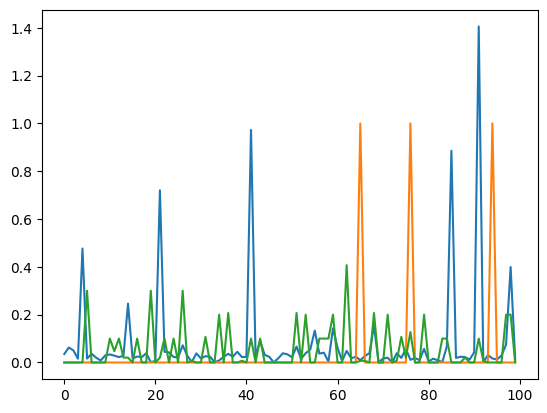

In [156]:
plt.plot(vspyct_preds.mean(axis=1)[:100,1])
plt.plot(y_atp_test[:100,1])
plt.plot(ensemble_spyct.predict(x_atp_test)[:100,1])

In [39]:
df.columns

Index(['timeunit', 'storageCost', 'interestRate', 'compidx0lt2',
       'compidx0lt2l1', 'compidx0lt2l2', 'compidx0lt2l4', 'compidx0lt2l8',
       'compidx1lt2', 'compidx2lt2',
       ...
       'Random_287', 'Random_288', 'Random_289', 'Random_290', 'Random_291',
       'Random_292', 'Random_293', 'Random_294', 'Random_295', 'Random_296'],
      dtype='object', length=592)

In [523]:
y_atp_test

array([[ 2.  , 20.  , 50.23],
       [20.5 , 48.2 , 49.3 ],
       [23.75, 58.  , 28.03],
       [23.  , 69.  , 30.43],
       [ 8.  , 30.  , 36.46],
       [23.5 , 60.  , 45.69],
       [22.  , 49.  , 29.63],
       [23.  , 58.  , 28.16],
       [ 0.  , 20.  , 41.14],
       [18.  , 48.  , 37.66],
       [17.5 , 48.  , 31.77],
       [21.25, 46.  , 36.32],
       [16.  , 26.  , 41.27],
       [17.  , 27.  , 32.84],
       [23.  , 55.  , 25.21],
       [ 0.  , 20.  , 44.08],
       [25.  , 69.  , 26.42],
       [14.5 , 20.  , 18.26],
       [26.5 , 78.  , 38.46],
       [19.  , 51.  , 38.46],
       [ 0.  , 20.  , 50.5 ]])

In [151]:
single_spyct.predict(x_atp_test)

array([[0.        , 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.05263158, 0.        , 0.        ],
       [4.        , 0.        , 0.        ],
       [0.05263158, 0.        , 0.        ],
       [0.33333334, 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.6666667 , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.05263158, 0.        , 0.        ],
       [0.06410257, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [152]:
vspyct_preds = vspyct.predict(torch.Tensor(x_atp_test))

In [153]:
vspyct_preds.mean(axis=1)[:,0].shape

torch.Size([214])

In [154]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_atp_test, vspyct_preds.mean(axis=1)),\
  mean_absolute_error(y_atp_test, ensemble_spyct.predict(x_atp_test)),\
    mean_absolute_error(y_atp_test, single_spyct.predict(x_atp_test))

(0.19776731758470745, 0.18993016502114937, 0.18152035014396328)

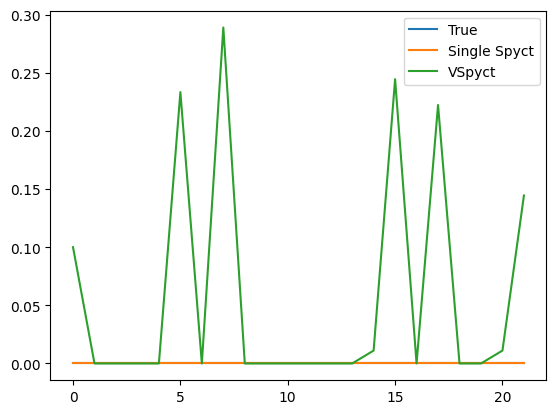

In [110]:
import matplotlib.pyplot as plt

i=2

plt.plot(y_atp_test[:100,i], label='True')
plt.plot(single_spyct.predict(x_atp_test)[:100,i], label='Single Spyct')
# plt.plot(ensemble_spyct.predict(x_atp_test)[:,i], label='Ensemble Spyct')
plt.plot(vspyct_preds.mean(axis=1)[:100,i], label='VSpyct')
plt.legend()

In [60]:
# import mean_absolute_error
from sklearn.metrics import mean_absolute_error, r2_score

for i in range(6):
  print(mean_absolute_error(y_atp_test[:,i], single_spyct.predict(x_atp_test)[:,i]), mean_absolute_error(y_atp_test[:,i], vspyct_preds.mean(axis=1)[:,i]))

0.23560217898339034 0.2320935455079262
0.22153846039794958 0.22651431703796754
0.06461538466123434 0.047493213823495


IndexError: index 3 is out of bounds for axis 1 with size 3

In [527]:
import numpy as np

def normalized_mae(y_true, y_pred):
    """
    Calculate the Normalized MAE for multi-target regression.
    
    Parameters:
    - y_true: numpy array of shape (n_samples, n_targets), ground truth values.
    - y_pred: numpy array of shape (n_samples, n_targets), predicted values.
    
    Returns:
    - normalized_mae: float, overall normalized MAE across all targets.
    """
    # Ensure the inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate absolute errors for each target
    abs_errors = np.abs(y_pred - y_true)
    
    # Calculate range (max - min) for each target
    ranges = y_true.max(axis=0) - y_true.min(axis=0)
    
    # Avoid division by zero: if range is zero, set to 1 (no normalization for that target)
    ranges[ranges == 0] = 1
    
    # Normalize errors by range
    normalized_errors = abs_errors / ranges
    
    # Calculate mean normalized error for each target
    mean_normalized_errors = normalized_errors.mean(axis=0)
    
    # Calculate overall normalized MAE (mean of normalized MAEs across targets)
    overall_normalized_mae = mean_normalized_errors.mean()
    
    return overall_normalized_mae

# # Example usage:
# y_true = np.array([[1, 100], [2, 200], [3, 300]])
# y_pred = np.array([[1.5, 110], [2.1, 190], [2.8, 310]])

# result = normalized_mae(y_true, y_pred)
# print(f"Normalized MAE: {result}")


In [528]:
normalized_mae(y_atp_test, single_spyct.predict(x_atp_test)), normalized_mae(y_atp_test, vspyct_preds.mean(axis=1))

(0.1821318450464455, 0.23919946852497345)

In [31]:
# mean_absolute_error(y_atp_test, vspyct_preds.mean(axis=1)),\
#   mean_absolute_error(y_atp_test, ensemble_spyct.predict(x_atp_test)),\
#     mean_absolute_error(y_atp_test, single_spyct.predict(x_atp_test))

In [553]:
mae_vspyct = normalized_mae(y_atp_test, vspyct_preds.mean(axis=1))
mae_spyct_single = normalized_mae(y_atp_test, single_spyct.predict(x_atp_test))
mae_spyct_ensemble = normalized_mae(y_atp_test, ensemble_spyct.predict(x_atp_test))

In [555]:
performance = [('vspyct', mae_vspyct), ('spyct_single', mae_spyct_single), ('spyct_ensemble', mae_spyct_ensemble)]

# save as pickle
import pickle
import os

os.makedirs('../final_results/mtr', exist_ok=True)

with open('../final_results/mtr/slump.pcl', 'wb') as f:
    pickle.dump(performance, f)

In [554]:
mae_vspyct, mae_spyct_ensemble, mae_spyct_single

(0.23919946852497345, 0.1657587808381458, 0.1821318450464455)

In [ ]:
import pickle

with open('../rf2_mae_vspyct.pcl', 'wb') as f:
  pickle.dump(mae_vspyct, f)

with open('../rf2_mae_spyct_single.pcl', 'wb') as f:
  pickle.dump(mae_spyct_single, f)

with open('../rf2_mae_spyct_ensemble.pcl', 'wb') as f:
  pickle.dump(mae_spyct_ensemble, f)


In [ ]:
# !pip install autorank

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

np.random.seed(42)
pd.set_option('display.max_columns', 7)
std = 0.3
means = [0.2, 0.3, 0.5, 0.8, 0.85, 0.9]
sample_size = 50
data = pd.DataFrame()
for i, mean in enumerate(means):
    data['pop_%i' % i] = np.random.normal(mean, std, sample_size).clip(0, 1)

In [ ]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

In [ ]:
plot_stats(result)
plt.show()

In [35]:
#load pickle file

import pickle
with open('../diabetes_f1_vspyct.pcl', 'rb') as f:
  mae_vspyct = pickle.load(f)

with open('../diabetes_f1_spyct_single.pcl', 'rb') as f:
  mae_spyct_single = pickle.load(f)

with open('../diabetes_f1_spyct_ensemble.pcl', 'rb') as f:
  mae_spyct_ensemble = pickle.load(f)


In [36]:
mae_vspyct, mae_spyct_single, mae_spyct_ensemble

(0.5932203389830509, 0.5354330708661418, 0.5982905982905983)